# Python


## Answer 8

#Importing data

In [1]:
import requests
import pandas as pd
# Define the API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_link)

# Extract the JSON data from the response
data = response.json()

# Extract the episodes data
episodes = data["_embedded"]["episodes"]

# Initialize empty lists to store the extracted data
show_id = []
urls = []
episode_name = []
episode_season = []
episode_number = []
episode_type = []
airdates = []
airtimes = []
runtimes = []
average_rating = []
summaries = []
medium_images = []
original_images = []

# Extract the required data attributes from each episode
for episode in episodes:
    show_id.append(episode["id"])
    urls.append(episode["url"])
    episode_name.append(episode["name"])
    episode_season.append(episode["season"])
    episode_number.append(episode["number"])
    episode_type.append(episode["type"])
    airdates.append(episode["airdate"])
    airtimes.append(episode["airtime"])
    runtimes.append(episode["runtime"])
    average_rating.append(episode["rating"]["average"])
    summaries.append(episode["summary"].strip())
    medium_images.append(episode["image"]["medium"])
    original_images.append(episode["image"]["original"])

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    "id": show_id,
    "url": urls,
    "name": episode_name,
    "season": episode_season,
    "number": episode_number,
    "type": episode_type,
    "airdate": airdates,
    "airtime": airtimes,
    "runtime": runtimes,
    "rating": average_rating,
    "summary": summaries,
    "medium_image": medium_images,
    "original_image": original_images
})

● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: rating, dtype: float64


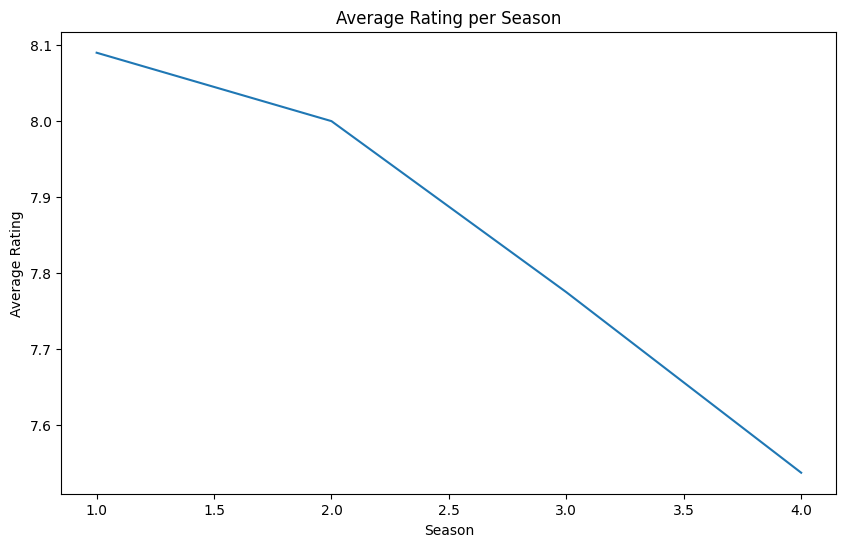

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
season_ratings = df.groupby('season')['rating'].mean()
print(season_ratings)
# Plotting the ratings for each season
plt.figure(figsize=(10, 6))
sns.lineplot(x=season_ratings.index, y=season_ratings.values)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Rating per Season')
plt.show()


● Get all the episode names, whose average rating is more than 8 for every season

In [3]:
highly_rated_episodes = df[df['rating'] > 8]
highly_rated_episodes = highly_rated_episodes.groupby('season')['name'].apply(list)
# Printing the episode names with average rating > 8 for each season
for season, episodes in highly_rated_episodes.items():
    print(f"Season {season}: {episodes}")

Season 1: ["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind']
Season 2: ['Kiksuya', 'Vanishing Point', 'The Passenger']


● Get all the episode names that aired before May 2019

In [4]:
early_episodes = df[df['airdate'] < '2019-05-01']['name']

# Print the episode names that aired before May 2019
print("Episodes aired before May 2019:")
for episode in early_episodes:
    print(episode)

Episodes aired before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger



● Get the episode name from each season with the highest and lowest rating


In [5]:
highest_rated_episodes = df.groupby('season')['rating'].idxmax()
lowest_rated_episodes = df.groupby('season')['rating'].idxmin()

In [6]:
# Printing the episode names with the highest and lowest rating for each season
for season, episode_idx in highest_rated_episodes.items():
    print(f"Highest rated episode in Season {season}: {df.loc[episode_idx, 'name']}")
for season, episode_idx in lowest_rated_episodes.items():
    print(f"Lowest rated episode in Season {season}: {df.loc[episode_idx, 'name']}")

Highest rated episode in Season 1: The Bicameral Mind
Highest rated episode in Season 2: Kiksuya
Highest rated episode in Season 3: Parce Domine
Highest rated episode in Season 4: Zhuangzi
Lowest rated episode in Season 1: The Stray
Lowest rated episode in Season 2: Akane No Mai
Lowest rated episode in Season 3: Decoherence
Lowest rated episode in Season 4: The Auguries


● Get the summary for the most popular ( ratings ) episode in every season.

In [7]:
most_popular_episodes = df.groupby('season')['rating'].idxmax()

# Print the summaries of the most popular episodes in each season
for season, episode_idx in most_popular_episodes.items():
    print(f"Summaries of the most popular episodes in each season {season}:")
    print(df.loc[episode_idx, 'summary'])
    print('\n')

Summaries of the most popular episodes in each season 1:
<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>


Summaries of the most popular episodes in each season 2:
<p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>


Summaries of the most popular episodes in each season 3:
<p>If you're stuck in a loop, try walking in a straight line.</p>


Summaries of the most popular episodes in each season 4:
<p>God is bored.</p>


